In [1]:
from aCAT import Predispatch, Dispatch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from helperFunctions import convert_to_datetime


In [2]:
sns.set_style("whitegrid")

#Color palatte
blue, red = sns.color_palette("muted", 2)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)


In [3]:
predispatch = Predispatch()
predispatch_region_sum = predispatch.get_table("REGION_SOLUTION")
predispatch_region_price = predispatch.get_table("REGION_PRICE")

# print(region_sum.head())

In [4]:
dispatch = Dispatch()
dispatch_region_sum = dispatch.get_table("REGION_SOLUTION")
dispatch_region_price = dispatch.get_table("REGION_PRICE")

# print(pd.to_datetime(dispatch_region_price["SETTLEMENTDATE"]))
dispatch_region_price['SETTLEMENTDATE'] = pd.to_datetime(dispatch_region_price['SETTLEMENTDATE'], format='\"%Y/%m/%d %H:%M:%S\"', exact=False)
dispatch_date_time = dispatch_region_price[dispatch_region_sum.REGIONID == "NSW1"].SETTLEMENTDATE

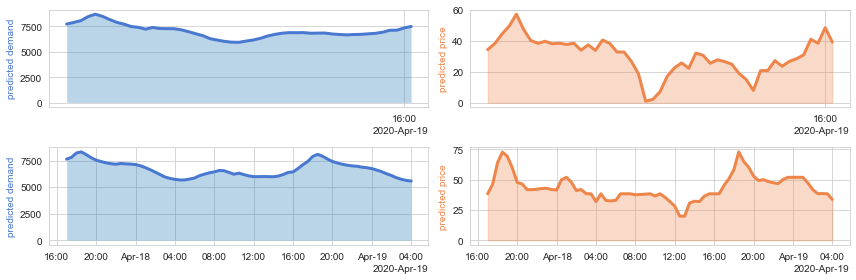

In [5]:
fig, ((dispatch_sum_ax, dispatch_price_ax), (predispatch_sum_ax, predispatch_price_ax)) = plt.subplots(nrows=2, ncols=2, figsize=(12,4))

dispatch_x = dispatch_date_time
dispatch_region_sum_y = dispatch_region_sum[dispatch_region_sum.REGIONID == "NSW1"].CLEAREDSUPPLY.astype(float)
dispatch_region_price_y = dispatch_region_price[dispatch_region_price.REGIONID == "NSW1"].RRP.astype(float)


predispatch_x = predispatch_region_sum[predispatch_region_sum.REGIONID == "NSW1"].PERIODID.astype(int)
predispatch_x = predispatch_x.apply(convert_to_datetime)
predispatch_region_sum_y = predispatch_region_sum[predispatch_region_sum.REGIONID == "NSW1"].CLEAREDSUPPLY.astype(float)
predispatch_region_price_y =predispatch_region_price[predispatch_region_price.REGIONID == "NSW1"].RRP.astype(float)


dispatch_sum_ax.set_ylabel('predicted demand', color=blue)
dispatch_sum_ax.plot(dispatch_x, dispatch_region_sum_y, color = blue, lw = 3)
dispatch_sum_ax.fill_between(dispatch_x, 0, dispatch_region_sum_y, alpha=.3)
dispatch_sum_ax.xaxis.set_major_locator(locator)
dispatch_sum_ax.xaxis.set_major_formatter(formatter)

dispatch_price_ax.set_ylabel('predicted price', color=red)
dispatch_price_ax.plot(dispatch_x, dispatch_region_price_y, color = red, lw = 3)
dispatch_price_ax.fill_between(dispatch_x, 0, dispatch_region_price_y, alpha=.3, color=red)
dispatch_price_ax.xaxis.set_major_locator(locator)
dispatch_price_ax.xaxis.set_major_formatter(formatter)


predispatch_sum_ax.set_ylabel('predicted demand', color=blue)
predispatch_sum_ax.plot(predispatch_x, predispatch_region_sum_y, color = blue, lw = 3)
predispatch_sum_ax.fill_between(predispatch_x, 0, predispatch_region_sum_y, alpha=.3)
predispatch_sum_ax.xaxis.set_major_locator(locator)
predispatch_sum_ax.xaxis.set_major_formatter(formatter)

predispatch_price_ax.set_ylabel('predicted price', color=red)
predispatch_price_ax.plot(predispatch_x, predispatch_region_price_y, color = red, lw = 3)
predispatch_price_ax.fill_between(predispatch_x, 0, predispatch_region_price_y, alpha=.3, color=red)
predispatch_price_ax.xaxis.set_major_locator(locator)
predispatch_price_ax.xaxis.set_major_formatter(formatter)

fig.tight_layout()
plt.show()